In [21]:
import imutils
from imutils import contours 
from skimage import measure  
import numpy as np          
import argparse
import cv2
import matplotlib.pyplot as plt
import os
import time

%matplotlib inline
from vlcs_mobile import copyVideo


In [22]:
def plot_imshow_in_array(matrices_to_show:list , max_image_in_row:int = 4 , plots_kwargs_list:list = []):
    """
        Plots the image list in an array of row * col , where max(col) = max_image_in_row, and the 
        number of rows is calculated accordingly. 
        @param matrices_to_show a list of matrices to be plotted using plt.imshow
        @param max_image_in_row maximum number of plots in one row
        @param plots_kwargs_list list of dictionaries of parameters of each plot
        
    """    
    ## total number of plots
    plot_count = len(matrices_to_show)
    
    assert len(plots_kwargs_list) == 0 or len(plots_kwargs_list) == len(matrices_to_show) , """ plots_kwargs_list should be either an empty 
                                                                                    list or should have the same number of members
                                                                                    as matrices_to_show """
    
    ## number of rows
    nrow = plot_count // max_image_in_row + (1 if (plot_count % max_image_in_row > 0) else 0)
    
    ## number of columns
    ncol = max_image_in_row if plot_count >= max_image_in_row else plot_count
    
    ## plotting using imshow
    fig , ax = plt.subplots(nrow , ncol , figsize = (12 , 6))
    for i in range(plot_count):
        
        ## select the subplot
        plt.subplot(nrow , ncol , i+1 )
        
        ## format the argument dictionary of the imshow function
        if(len(plots_kwargs_list) == 0):
            config_dict = {}
        else: 
            config_dict = plots_kwargs_list[i]
        
        ## pass the image as well as extra arguments to the imshow function
        plt.imshow(matrices_to_show[i] , **config_dict)
        
    return fig , ax 
    

In [23]:
def split_video(input_video_path, output_folder):
    # open the video
    cap = cv2.VideoCapture(input_video_path)
    
    # get the fps of video
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    
    # calculate frames per second
    frames_per_second = fps
    frames_per_clip = frames_per_second * 1
    
    for i in range(3):
        output_video_path = f"{output_folder}/clip_{i+1}.mp4"
        writer = cv2.VideoWriter(output_video_path, cv2.VideoWriter_fourcc(*'mp4v'), fps, (int(cap.get(3)),int(cap.get(4))))

        for _ in range(frames_per_clip):
            ret, frame = cap.read()
            if not ret:
                break
            writer.write(frame)

        writer.release()
    cap.release()

In [24]:
split_video("./resources/rolling_shutter.mp4", "rolling_shutter")

30


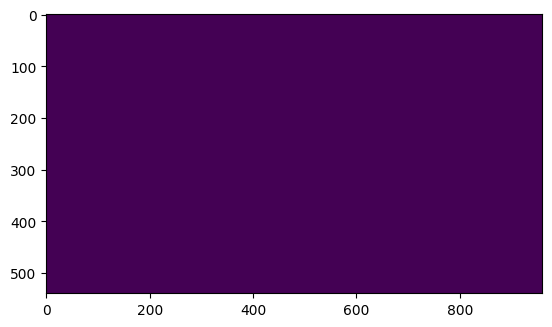

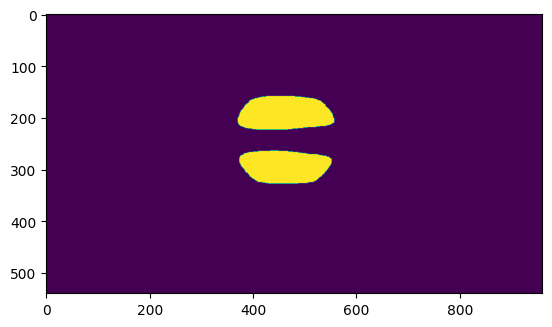

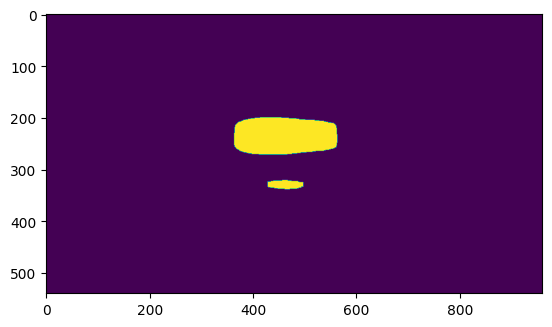

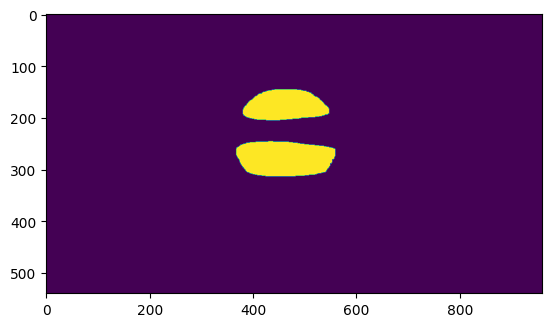

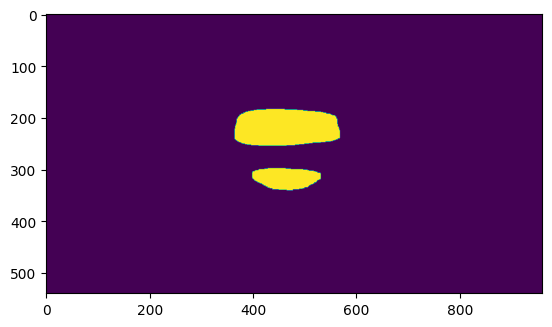

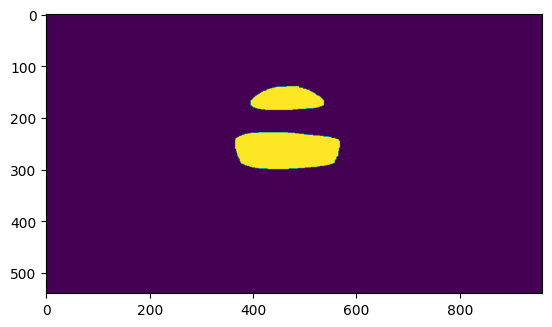

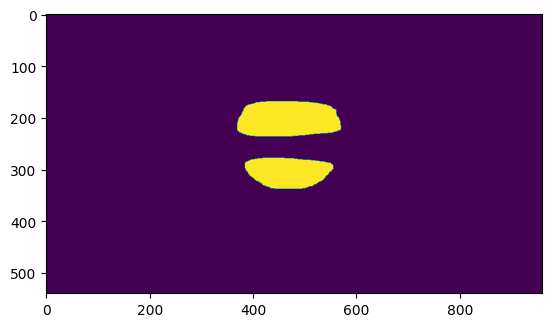

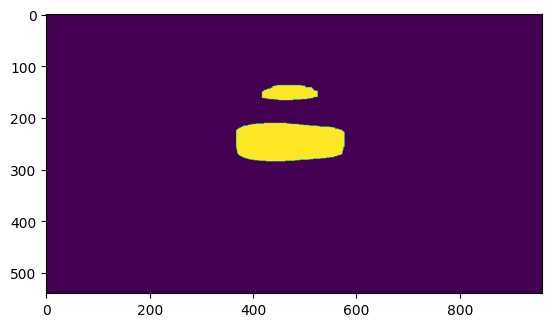

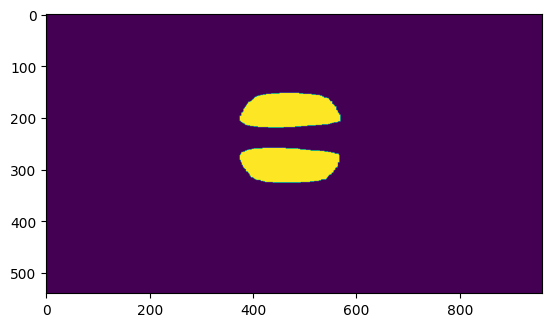

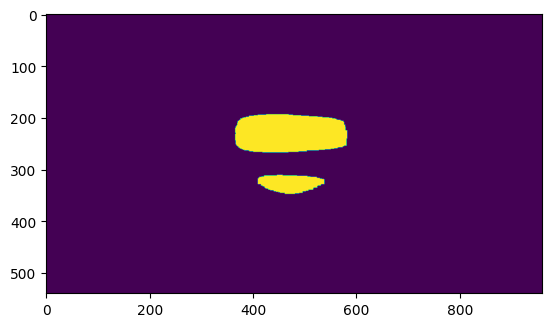

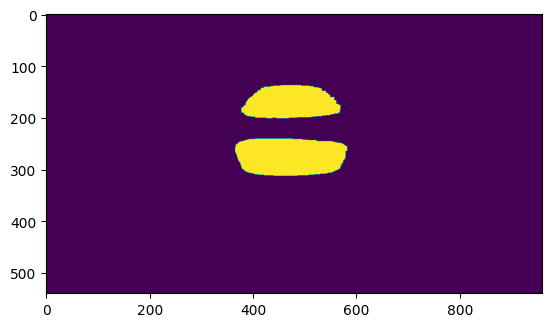

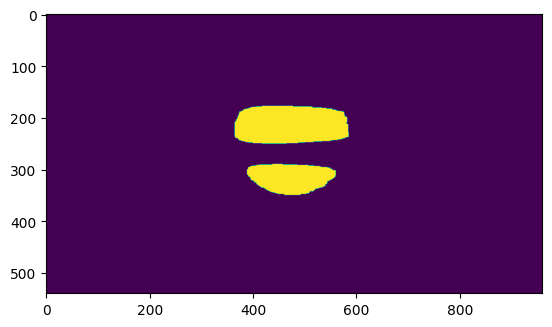

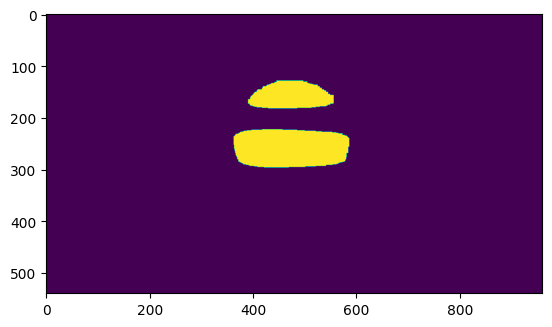

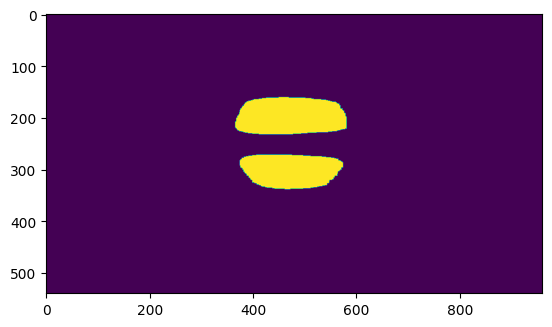

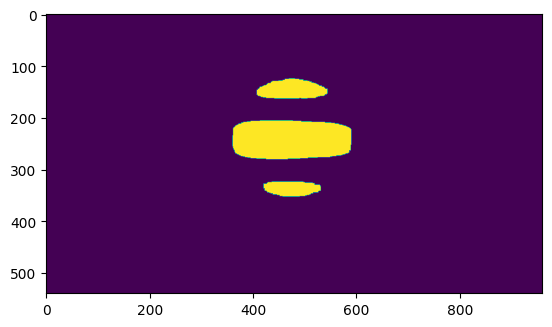

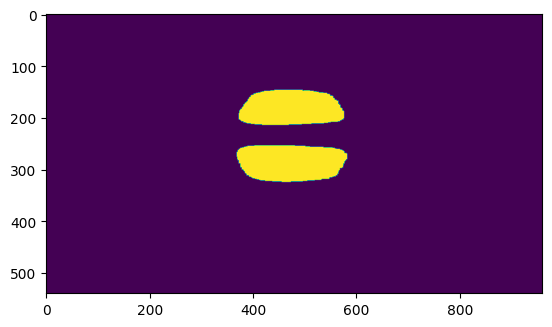

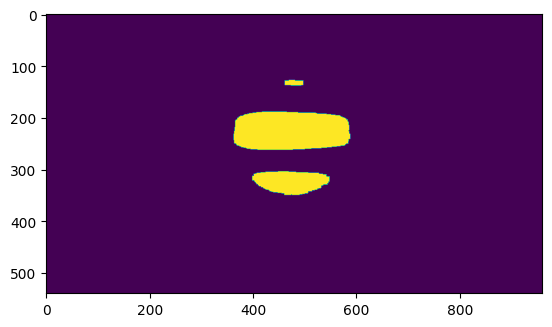

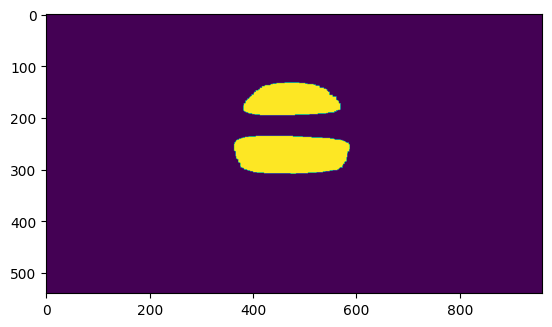

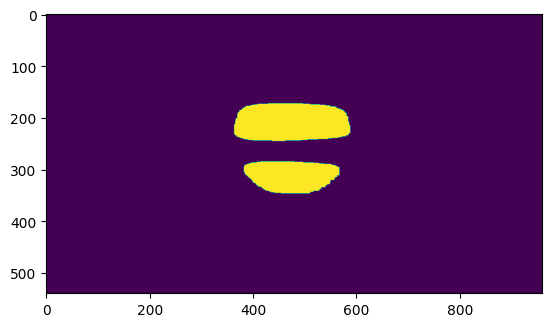

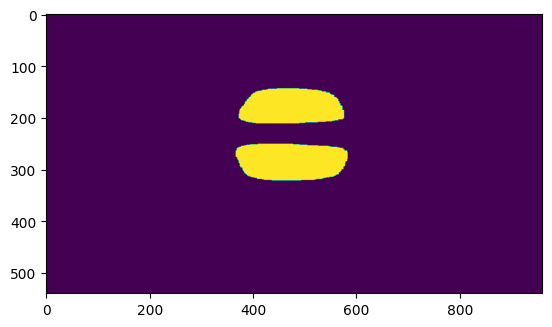

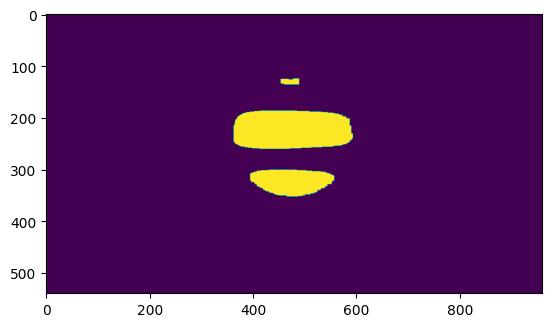

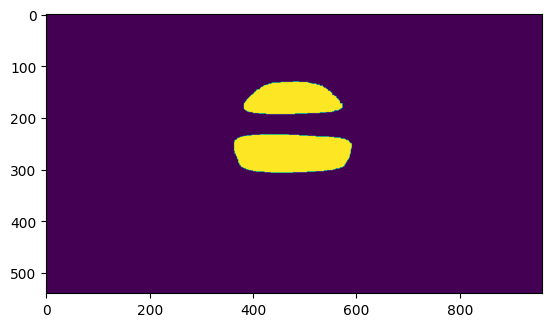

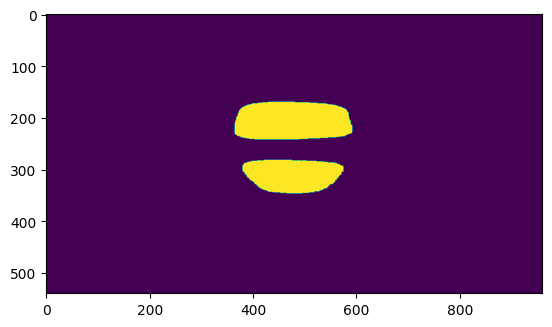

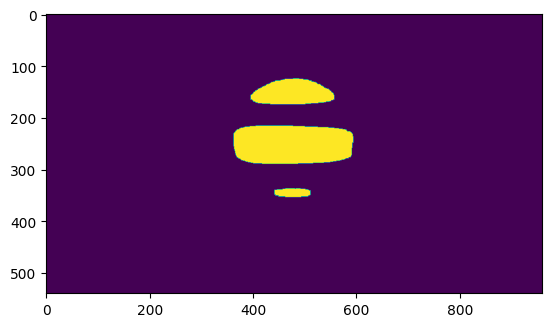

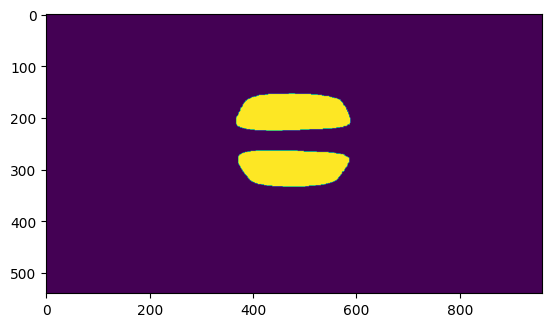

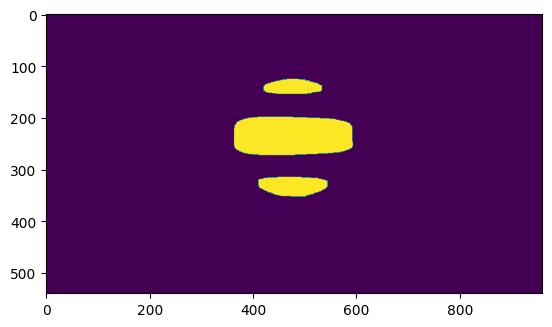

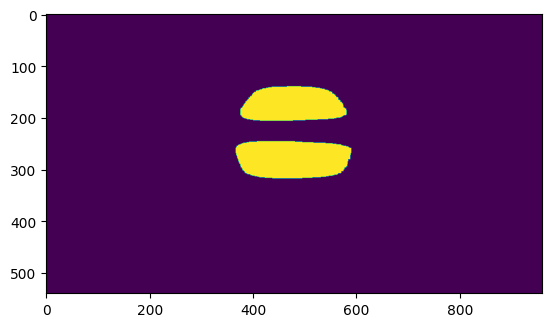

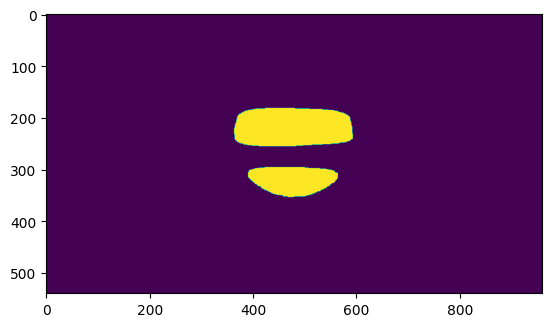

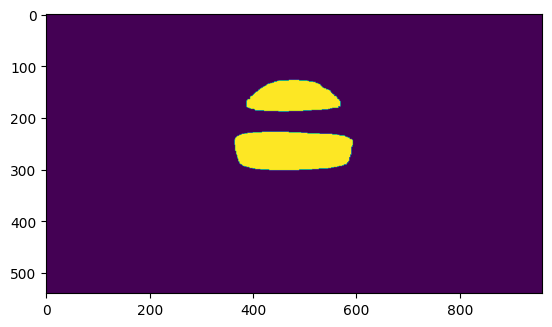

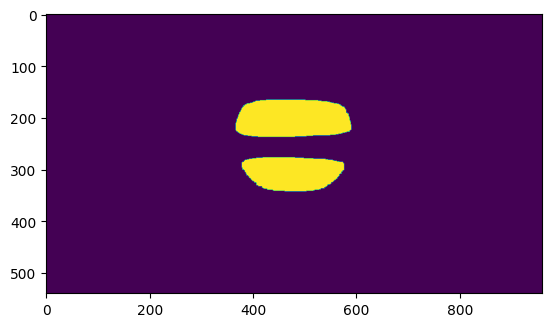

In [35]:
video = "./rolling_shutter/clip_1.mp4"
cap = cv2.VideoCapture(video)

total = cap.get(cv2.CAP_PROP_FRAME_COUNT)

i = 0

##this is used for saving all of the frames
thresh_list = []
while (cap.isOpened() and i<total):
    ret, frame = cap.read()
    if ret:
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        gray = cv2.resize(gray,None,fx=0.5,fy=0.5)
#         cv2.imshow('Gray',gray)
        ## SEE IF IT GENERATES THRESHOLD
        # thresh = cv2.threshold(gray, 0 , 255 , cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1] ##need to adjust the second parameter according to the reality
        thresh =cv2.threshold(gray, 105 , 255 , cv2.THRESH_BINARY)[1]
        ##remove bobles noises
        thresh = cv2.erode(thresh, None, iterations=2)
        thresh = cv2.dilate(thresh, None, iterations=4)
        thresh_list.append(thresh)    
        cv2.waitKey(60)
        i += 1
print(len(thresh_list))
for thresh in thresh_list:
    plt.imshow(thresh)
    plt.show()
cap.release()
cv2.destroyAllWindows()

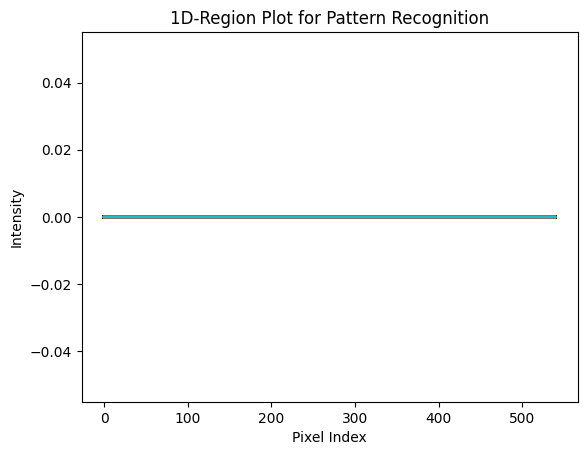

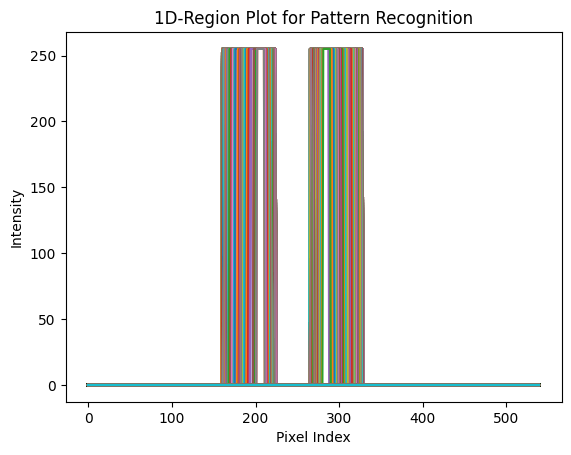

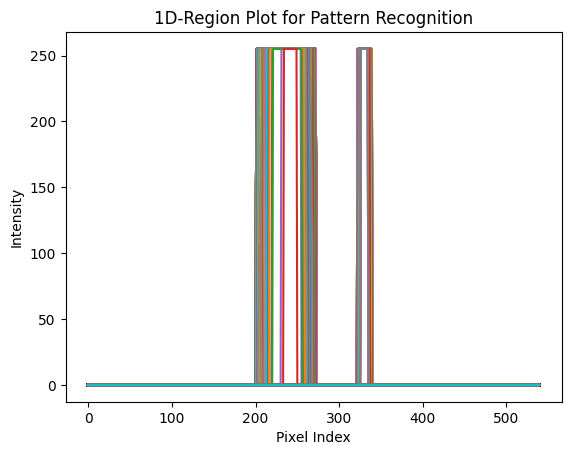

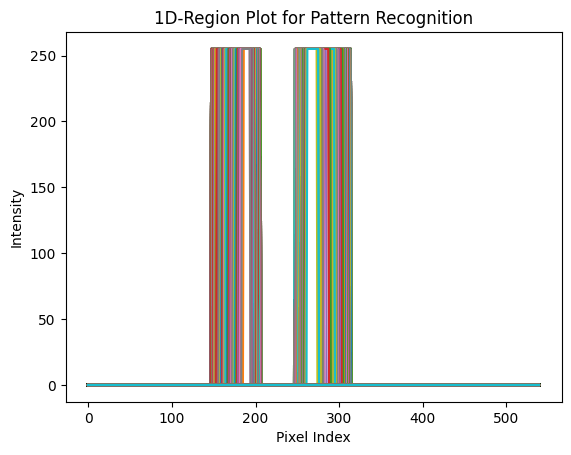

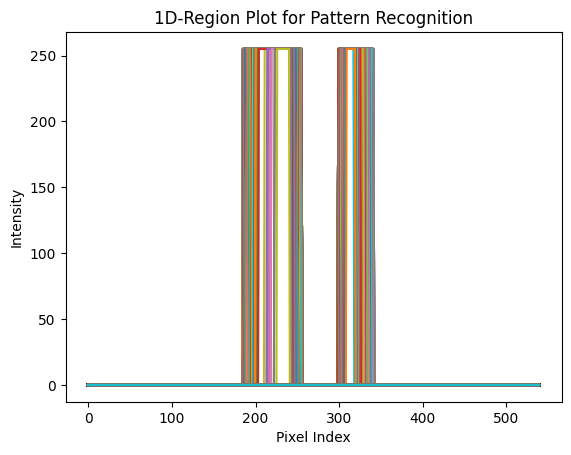

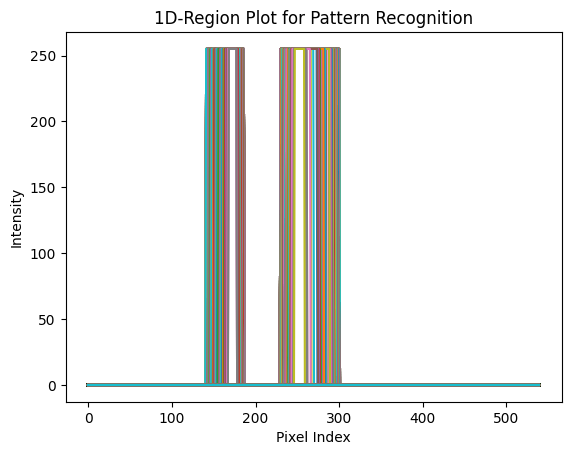

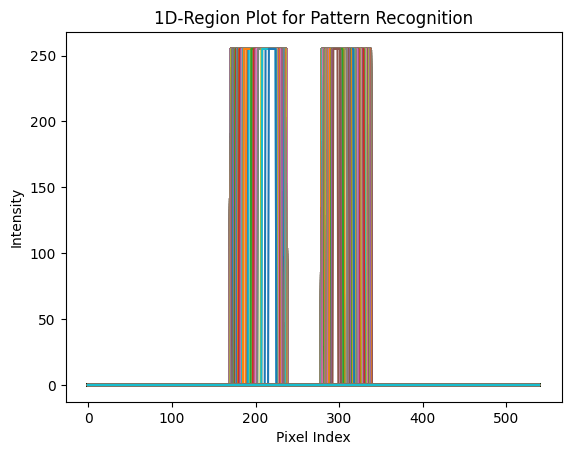

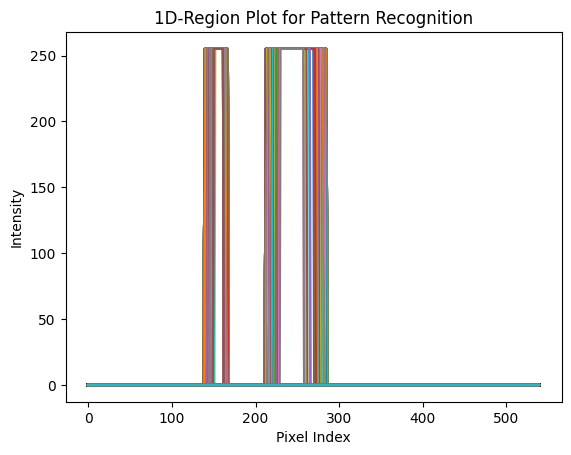

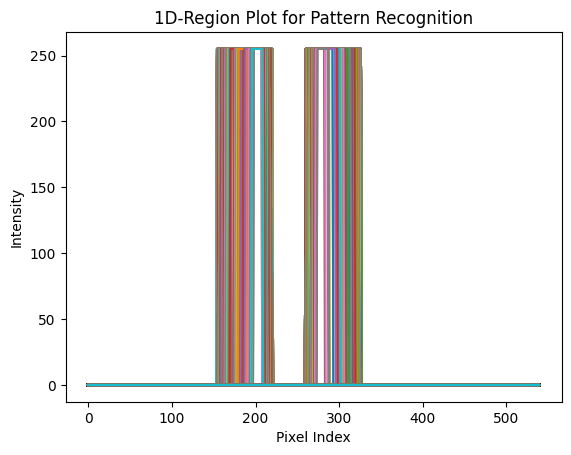

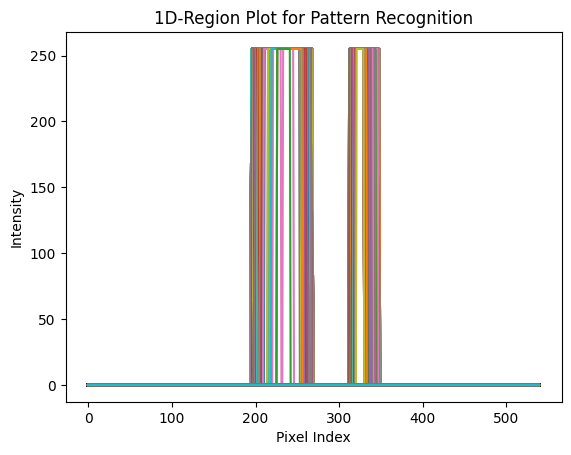

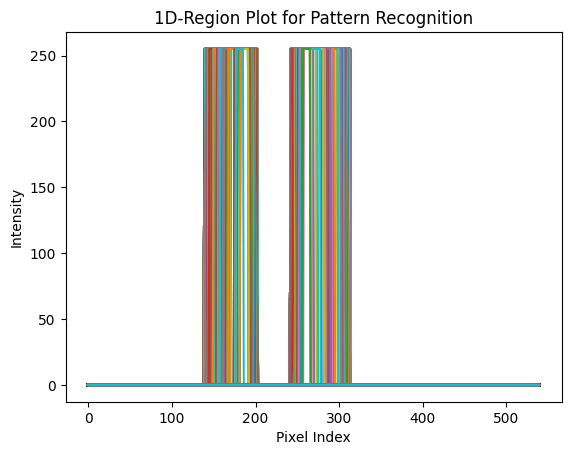

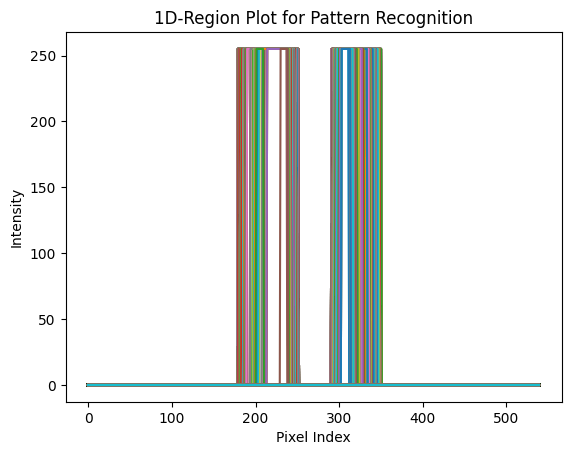

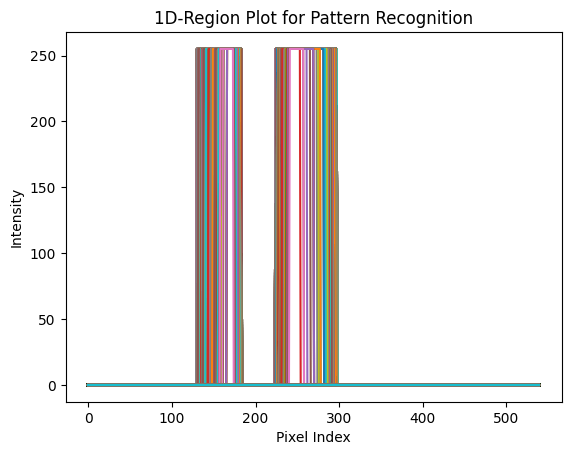

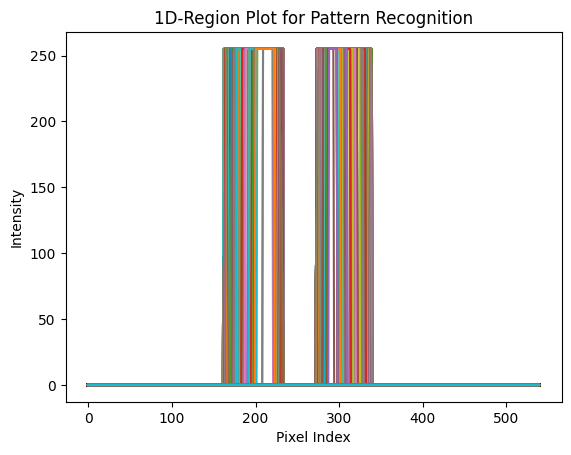

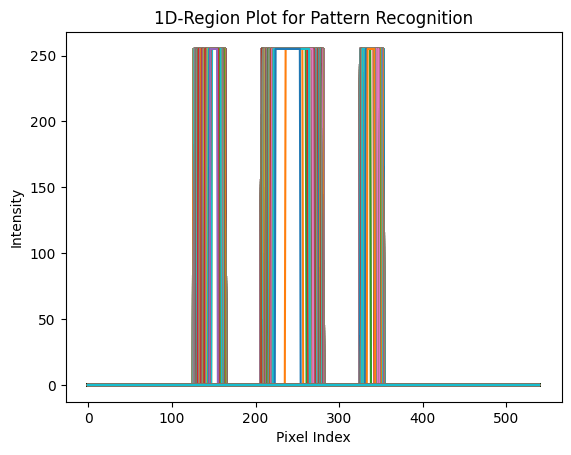

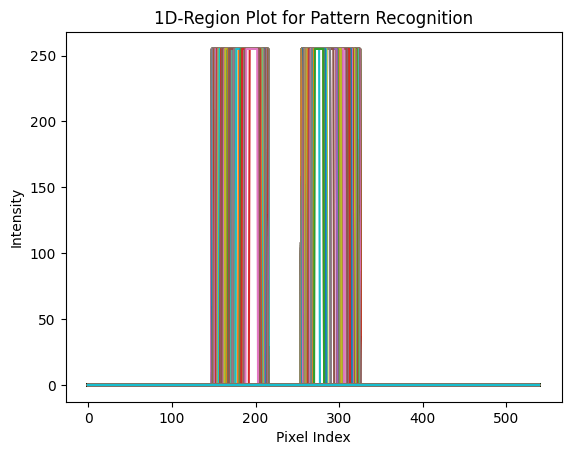

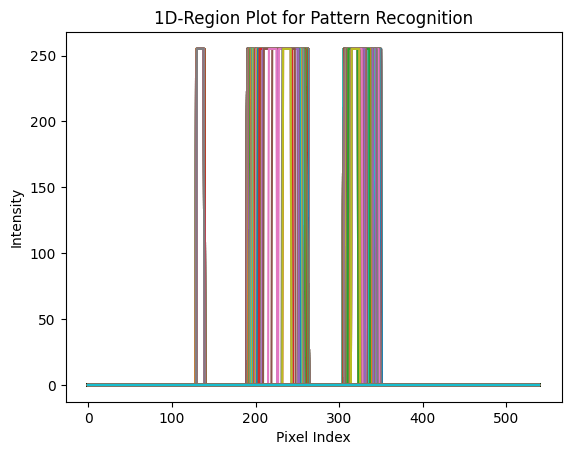

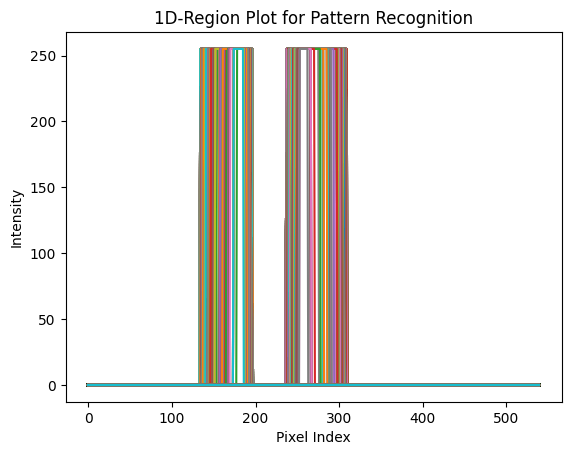

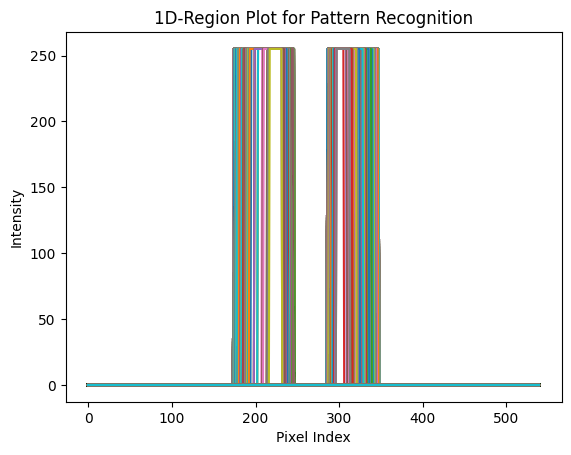

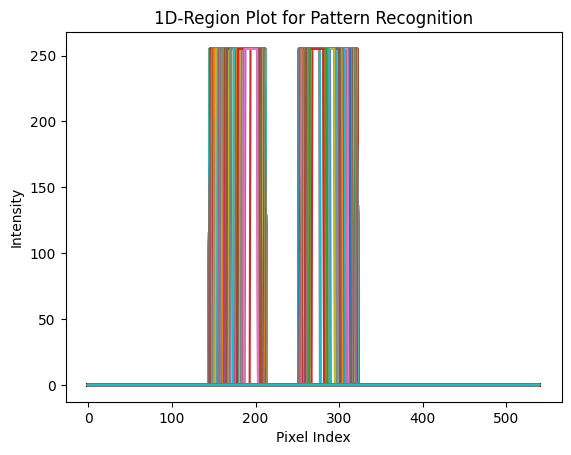

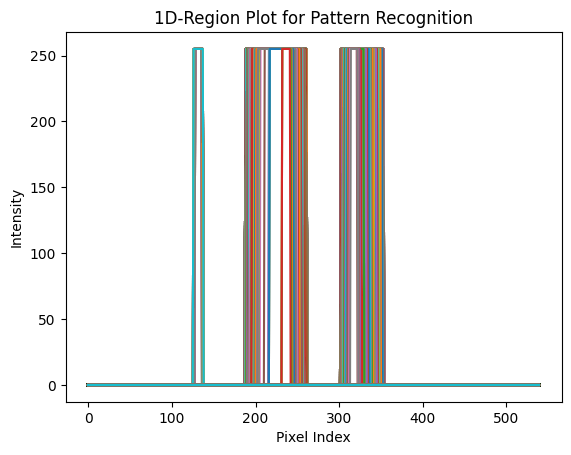

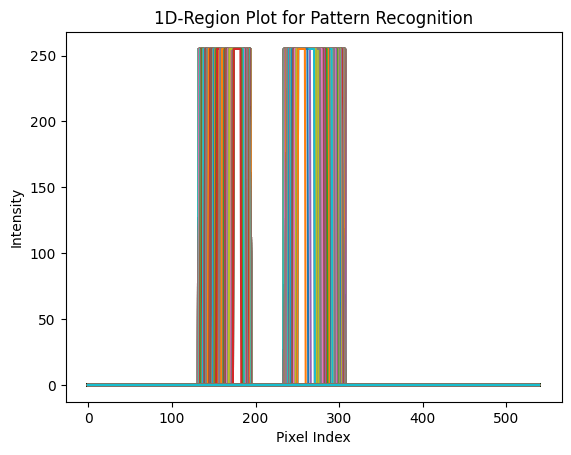

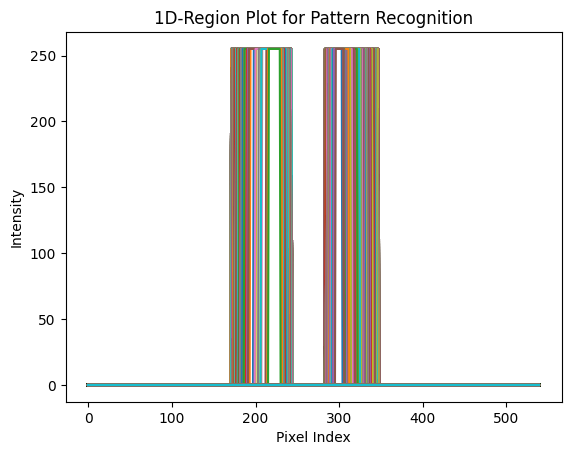

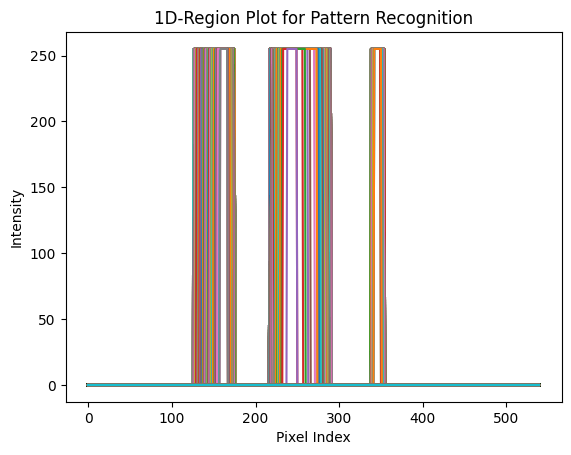

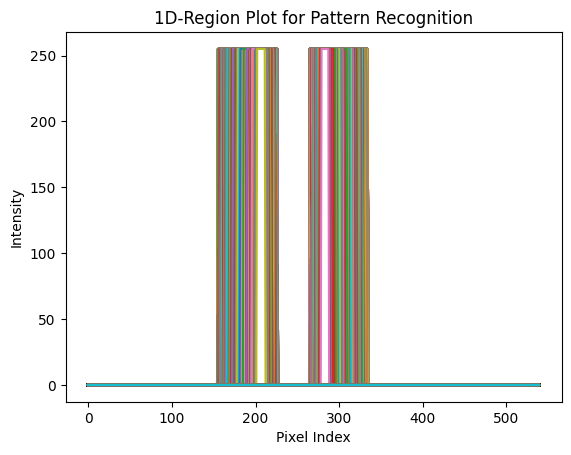

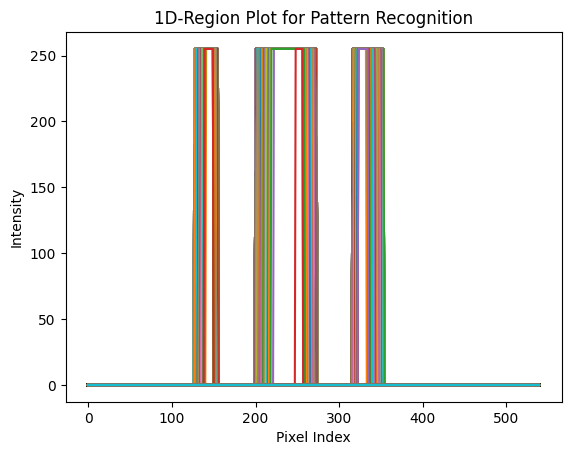

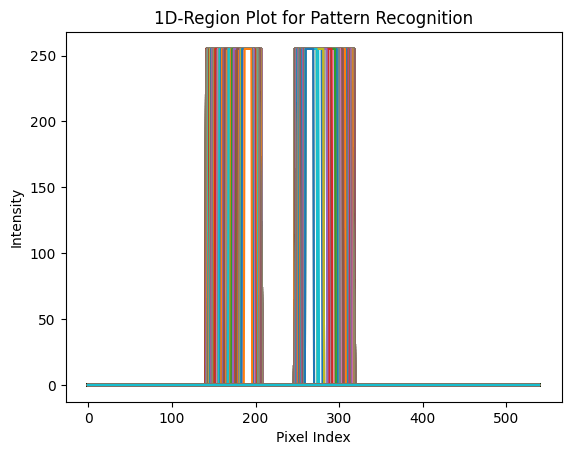

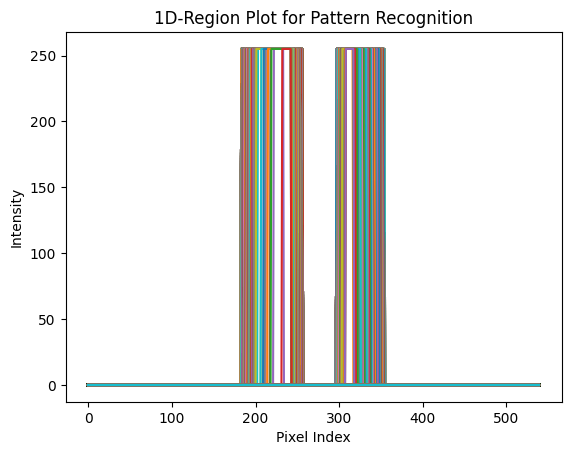

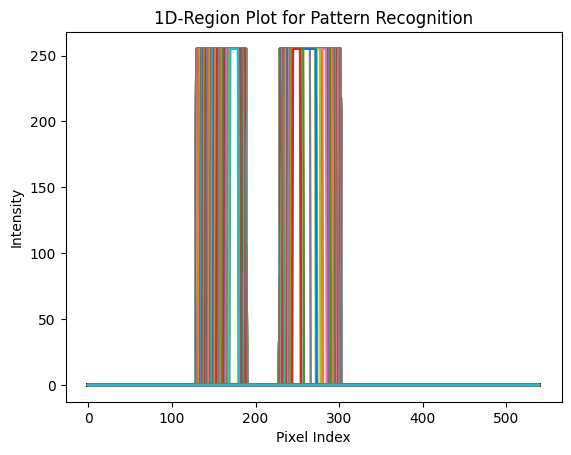

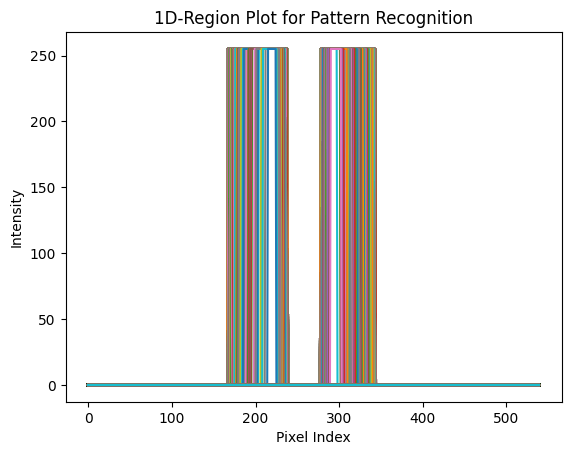

In [37]:
for thresh in thresh_list:
    region = thresh[0, :]
    x = np.arange(len(thresh))
    # Plot the 1D-region
    plt.plot(x, thresh)
    plt.xlabel('Pixel Index')
    plt.ylabel('Intensity')
    plt.title('1D-Region Plot for Pattern Recognition')
    plt.show()